# Tick Data Exploring

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import binance_helpers as bh
import time
import matplotlib.pyplot as plt

In [508]:
client = bh.new_binance_client()

In [597]:
start, pair = int(datetime(2021, 12, 30, 7, 40, 28).timestamp()*1000), "LINKUSDT" #31
# start, pair = int(datetime(2021, 12, 23, 8, 43, 51).timestamp()*1000), "XLMUSDT" #52
# start, pair = int(datetime(2021, 12, 18, 8, 21, 6).timestamp()*1000), "GALAUSDT" 
# start, pair = int(datetime(2021, 12, 11, 7, 44, 26).timestamp()*1000), "NEARUSDT" #27
# start, pair = int(datetime(2021, 12, 9, 8, 31, 51).timestamp()*1000), "MATICUSDT" #52

In [598]:
# agg_trades = client.get_aggregate_trades(symbol=pair, startTime=start, endTime=start+10000)
agg_trades = client.futures_aggregate_trades(symbol=pair, startTime=start, endTime=start+10000)

In [599]:
len(agg_trades)

451

In [600]:
df = pd.DataFrame(list(map(lambda x: float(x['p']), agg_trades)), 
                  index=list(map(lambda x: datetime.fromtimestamp(x['T'] / 1e3), agg_trades)), 
                  columns=['price'])
df['q'] = list(map(lambda x: float(x['q']), agg_trades))
df['m'] = list(map(lambda x: x['m'], agg_trades))

In [601]:
d = df.groupby(df.index)
df1 = pd.DataFrame({"price":d.mean().price,
                   "q": d.sum().q,
                   "m":df[~df.index.duplicated(keep='first')].m},
                  index=d.mean().index)

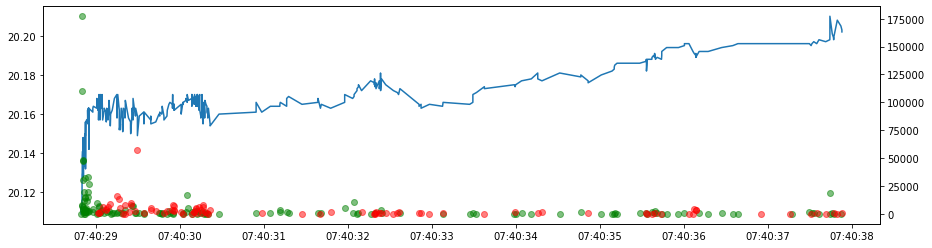

In [602]:
fig, ax = plt.subplots(figsize=(15,4))
m = df1[df1.m==False][:]
m_ = df1[df1.m][:]
ax.plot(df.index, df.price)
ax1 = ax.twinx()
ax1.scatter(m.index, m.q*m.price, color='green', alpha=0.5)
ax1.scatter(m_.index, m_.q*m_.price, color='red', alpha=0.5)

In [603]:
sum(m_.q*m_.price)

279276.1856699167

## First 10 minutes analysis

In [604]:
agg_trades = client.futures_aggregate_trades(symbol=pair, startTime=start, endTime=start+100000, limit=1000)

In [605]:
while agg_trades[-1]['T']<start+20*60*1000:
    time.sleep(0.5)
    agg_trades += client.futures_aggregate_trades(symbol=pair, fromId=str(agg_trades[-1]['a']+1), limit=1000)

In [606]:
len(agg_trades)

4957

In [607]:
df = pd.DataFrame(list(map(lambda x: float(x['p']), agg_trades)), 
                  index=list(map(lambda x: datetime.fromtimestamp(x['T'] / 1e3), agg_trades)), 
                  columns=['price'])
df['q'] = list(map(lambda x: float(x['q']), agg_trades))
df['m'] = list(map(lambda x: x['m'], agg_trades))

In [608]:
d = df.groupby(df.index)
df1 = pd.DataFrame({"price":d.mean().price,
                   "q": d.sum().q,
                   "m":df[~df.index.duplicated(keep='first')].m},
                  index=d.mean().index)

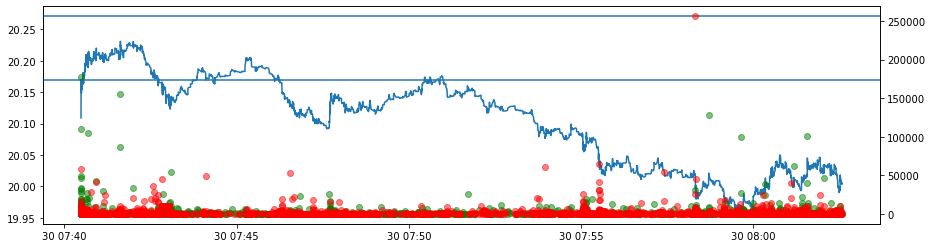

In [610]:
fig, ax = plt.subplots(figsize=(15,4))
m = df1[df1.m==False][:]
m_ = df1[df1.m][:]
ax.plot(df.index, df.price)
ax1 = ax.twinx()
ax.axhline(20.17)
ax.axhline(20.17*1.005)

ax1.scatter(m.index, m.q*m.price, color='green', alpha=0.5)
ax1.scatter(m_.index, m_.q*m_.price, color='red', alpha=0.5)